In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
import numpy as np

# Ensure required resources for nltk are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd

# List of Excel files
file_list = [
    "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset_1_2_3_combined.xlsx",
    "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset4.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset5.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset6.xlsx",
    "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset7.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset8.xlsx",
   "B:\OneDrive - Amity University\Desktop\Infosys\Approved_datasets\dataset9.xlsx"
]

# Read and concatenate the files
dataframes = []
for file in file_list:
    df = pd.read_excel(file)
    dataframes.append(df)

# Concatenate all the DataFrames
data = pd.concat(dataframes, ignore_index=True)


In [3]:
print(data.shape)         # Number of rows and columns
print(data.columns)       # Column names
print(data.head())        # Preview the first few rows


(3174, 9)
Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description',
       'Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects th


--- Missing Values ---
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

C:\Users\sidhe\AppData\Local\Temp\ipykernel_3236\1771758826.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Role', data=data, order=data['Role'].value_counts().index, palette="viridis")


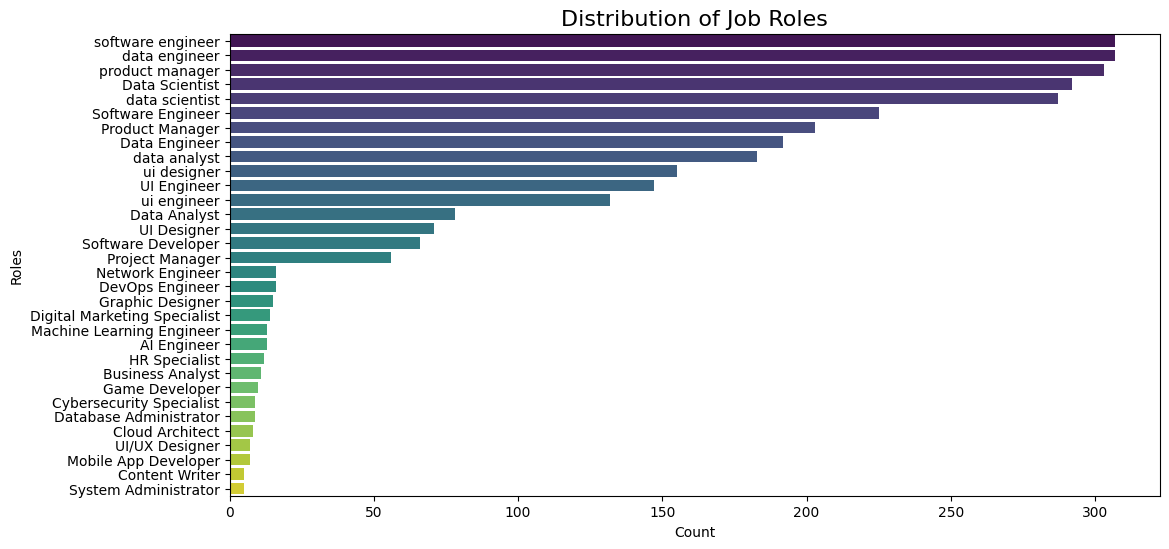

C:\Users\sidhe\AppData\Local\Temp\ipykernel_3236\1771758826.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decision', data=data, palette="coolwarm")


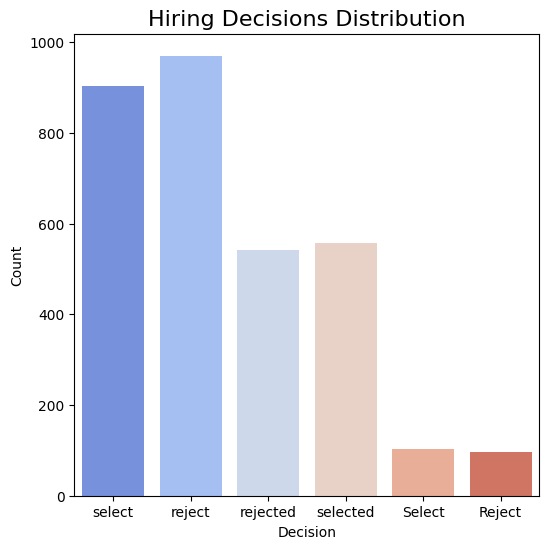

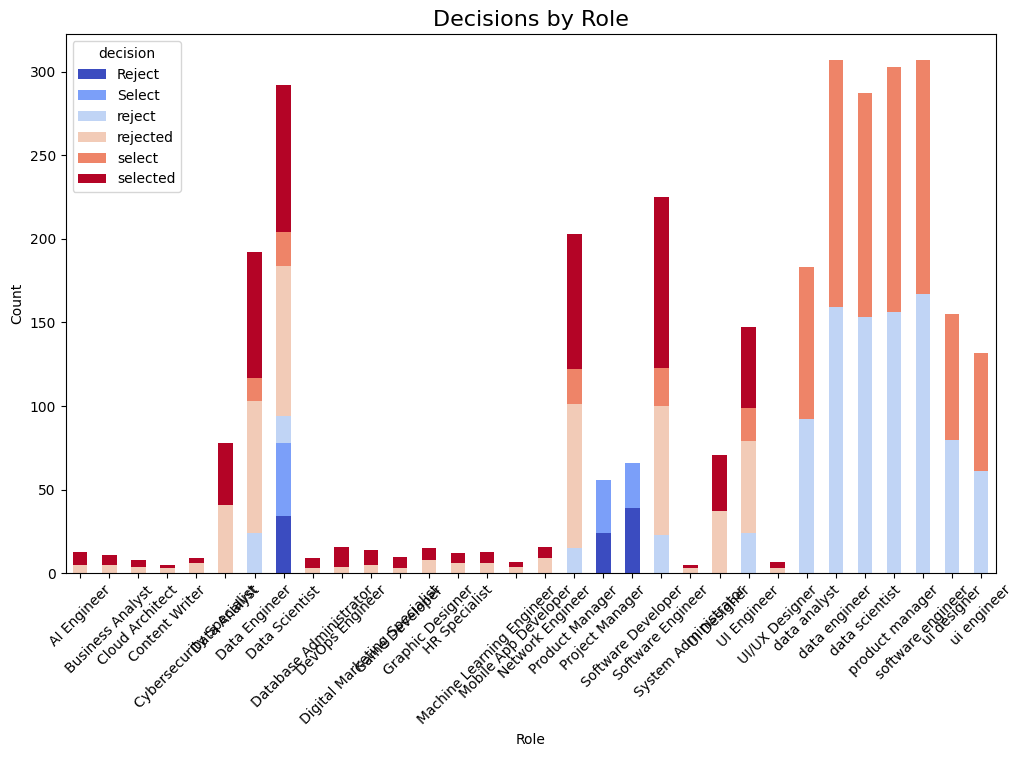

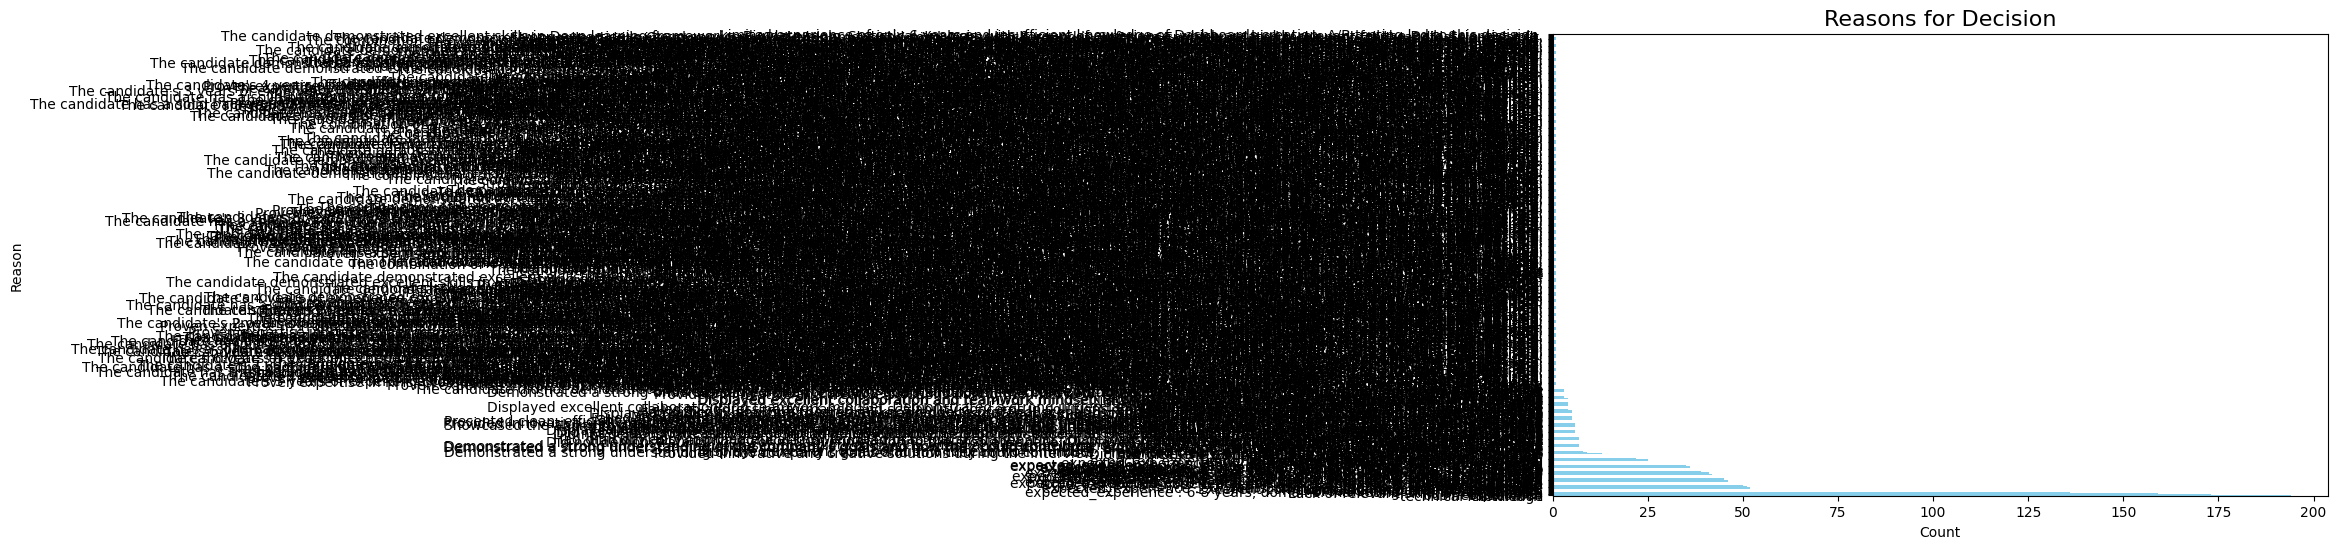

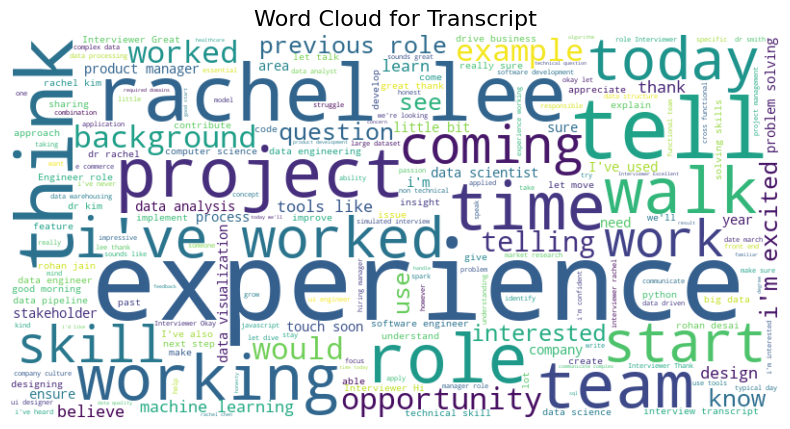

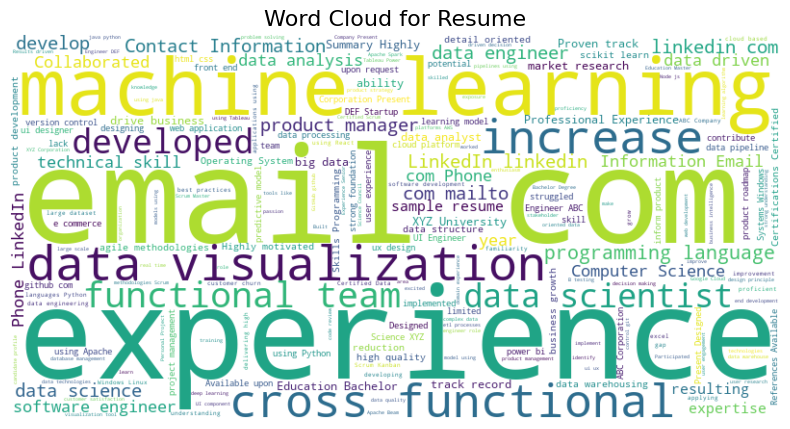

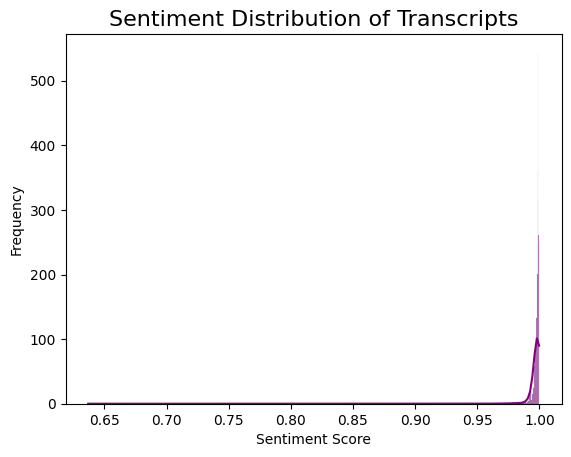

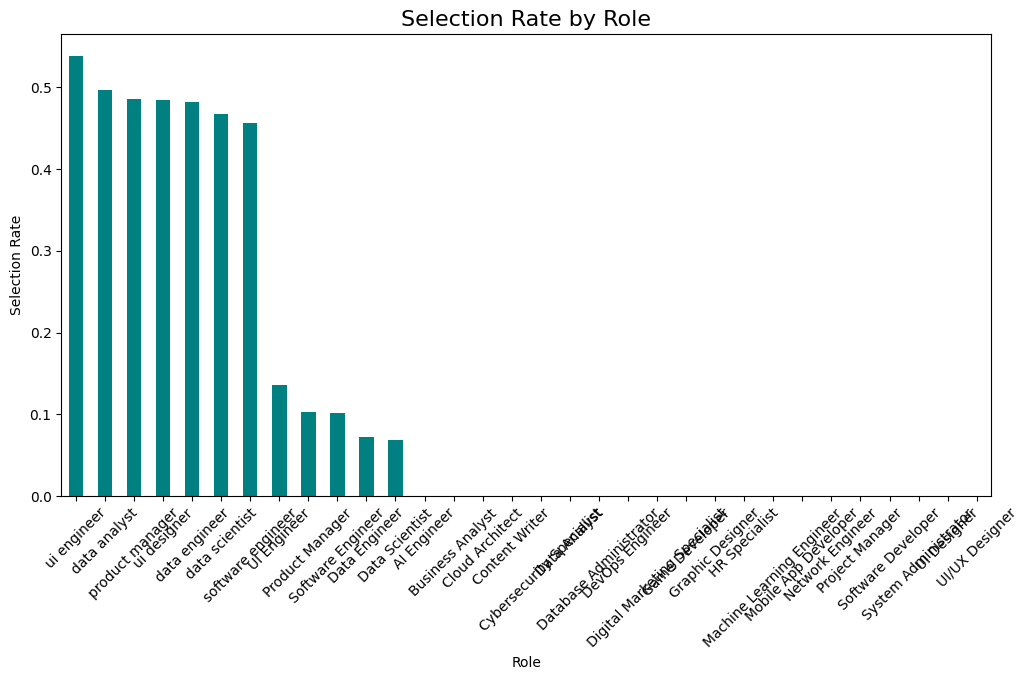

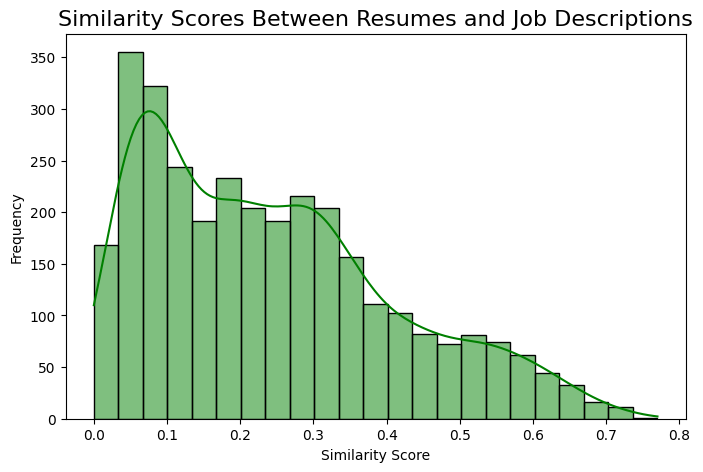

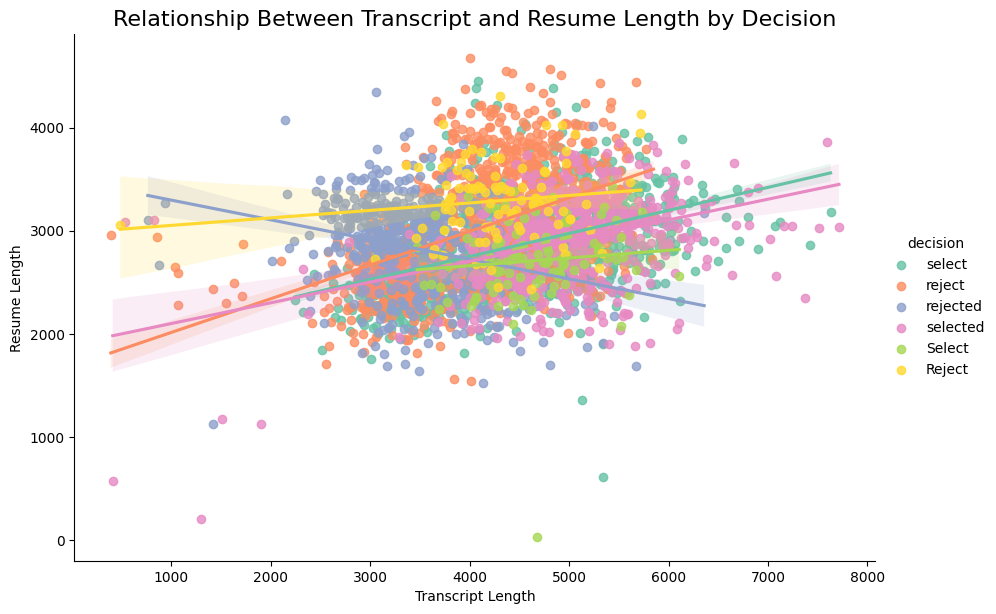

C:\Users\sidhe\AppData\Local\Temp\ipykernel_3236\1771758826.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='Blues_d')


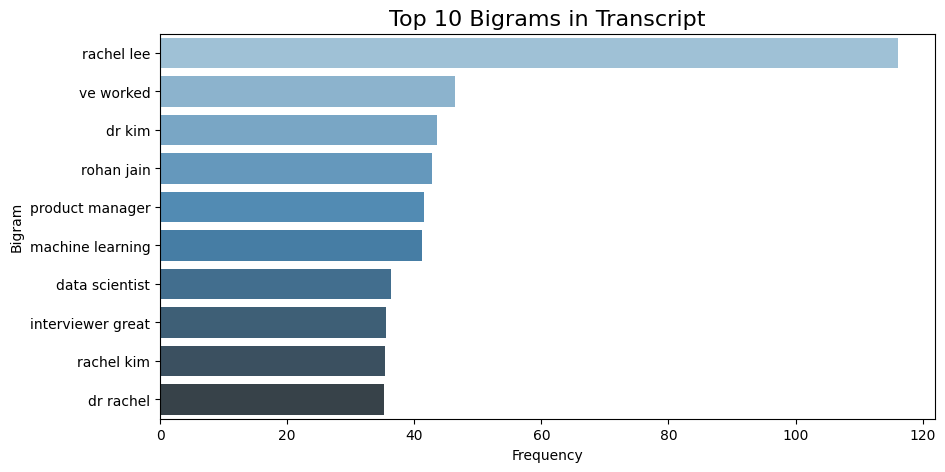

C:\Users\sidhe\AppData\Local\Temp\ipykernel_3236\1771758826.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='Blues_d')


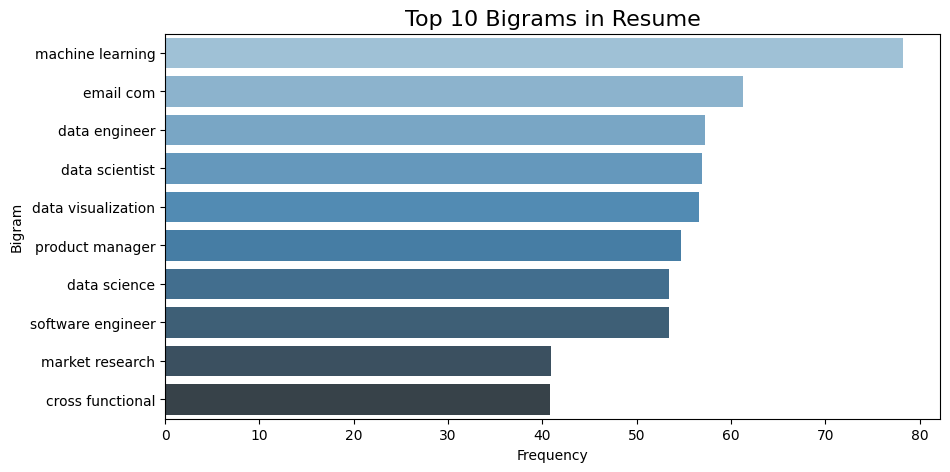

Enhanced dataset with additional features saved as Final_EDA_Infy_output.csv


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Missing Values ---
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

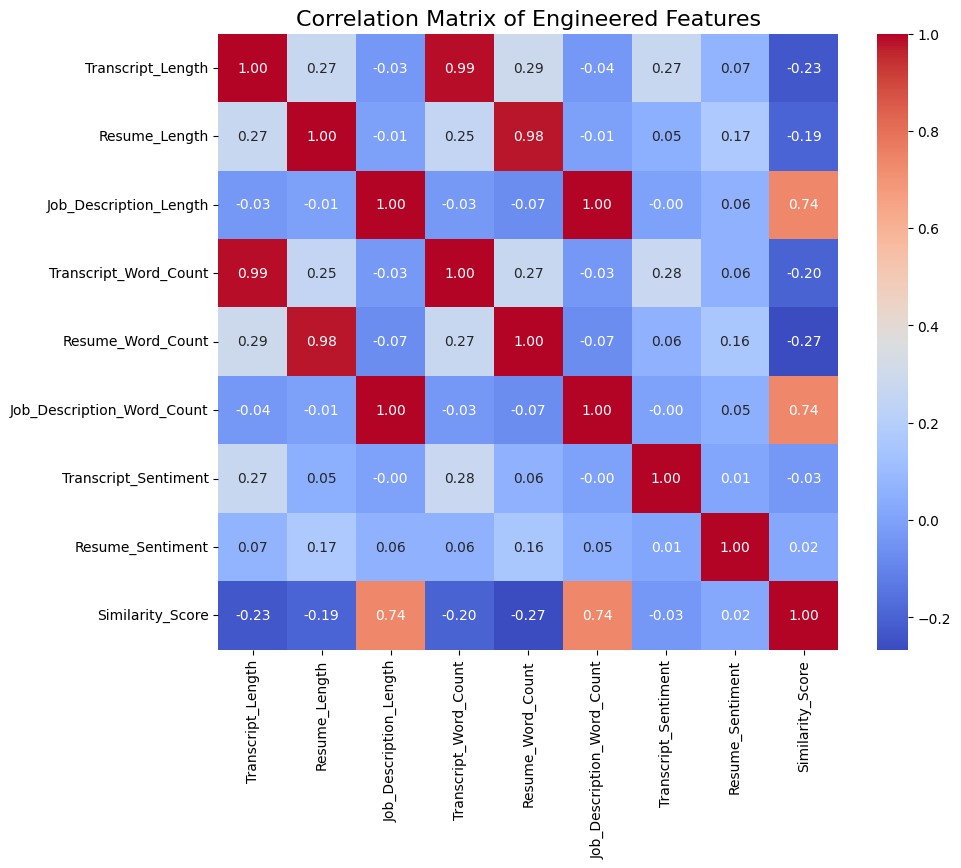

Feature engineered dataset saved as data.to_csv('Infy_EDA_Feature Engineering_insights.csv


In [4]:
# General Overview
print("\n--- Missing Values ---")
print(data.isnull().sum())
print("\n--- Duplicate Entries ---")
print(data.duplicated().sum())

# Distribution of roles and decisions
plt.figure(figsize=(12, 6))
sns.countplot(y='Role', data=data, order=data['Role'].value_counts().index, palette="viridis")
plt.title('Distribution of Job Roles', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Roles')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='decision', data=data, palette="coolwarm")
plt.title('Hiring Decisions Distribution', fontsize=16)
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

# Decision Analysis
role_decision = data.groupby(['Role', 'decision']).size().unstack()
role_decision.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
plt.title('Decisions by Role', fontsize=16)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

reason_decision = data['Reason for decision'].value_counts()
reason_decision.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Reasons for Decision', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

# Text Data Insights
# Word Cloud for Transcripts and Resumes
stop_words = set(stopwords.words('english'))

for column in ['Transcript', 'Resume']:
    text = " ".join(data[column].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column}', fontsize=16)
    plt.show()

# Sentiment Analysis on Transcripts
sia = SentimentIntensityAnalyzer()
data['Transcript Sentiment'] = data['Transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])
sns.histplot(data['Transcript Sentiment'], kde=True, color="purple")
plt.title('Sentiment Distribution of Transcripts', fontsize=16)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Role-Specific Trends
role_selection_rate = data[data['decision'] == 'select']['Role'].value_counts() / data['Role'].value_counts()
role_selection_rate.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Selection Rate by Role', fontsize=16)
plt.ylabel('Selection Rate')
plt.xlabel('Role')
plt.xticks(rotation=45)
plt.show()

# Job Description and Resume Matching
def compute_similarity(row):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([row['Job Description'], row['Resume']])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

data['Similarity Score'] = data.apply(compute_similarity, axis=1)
plt.figure(figsize=(8, 5))
sns.histplot(data['Similarity Score'], kde=True, color="green")
plt.title('Similarity Scores Between Resumes and Job Descriptions', fontsize=16)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Correlations
# Length of transcripts and resumes
data['Transcript Length'] = data['Transcript'].apply(len)
data['Resume Length'] = data['Resume'].apply(len)
sns.lmplot(x='Transcript Length', y='Resume Length', hue='decision', data=data, height=6, aspect=1.5, palette="Set2")
plt.title('Relationship Between Transcript and Resume Length by Decision', fontsize=16)
plt.xlabel('Transcript Length')
plt.ylabel('Resume Length')
plt.show()

# Advanced Analysis: Keyword Analysis and N-grams
from collections import Counter

def get_top_ngrams(text_series, n=2, top_k=10):
    vectorizer = TfidfVectorizer(ngram_range=(n, n), stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(text_series)
    sum_words = tfidf_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_words[:top_k]

# Top Bigrams in Transcripts and Resumes
for column in ['Transcript', 'Resume']:
    top_bigrams = get_top_ngrams(data[column].dropna(), n=2, top_k=10)
    bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='Blues_d')
    plt.title(f'Top 10 Bigrams in {column}', fontsize=16)
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')
    plt.show()

# Save enhanced dataset for further analysis
data.to_csv("B:\OneDrive - Amity University\Desktop\Infosys\File\dataassign-2\Final_EDA_Infy_output.csv", index=False)
print("Enhanced dataset with additional features saved as Final_EDA_Infy_output.csv")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

# Ensure required resources for nltk are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')


# General Overview
print("\n--- Missing Values ---")
print(data.isnull().sum())
print("\n--- Duplicate Entries ---")
print(data.duplicated().sum())

# Feature Engineering
# Encode categorical variables
label_encoder = LabelEncoder()
data['Role_encoded'] = label_encoder.fit_transform(data['Role'])
data['Decision_encoded'] = label_encoder.fit_transform(data['decision'])

# Text length features
data['Transcript_Length'] = data['Transcript'].apply(len)
data['Resume_Length'] = data['Resume'].apply(len)
data['Job_Description_Length'] = data['Job Description'].apply(len)

# Word count features
data['Transcript_Word_Count'] = data['Transcript'].apply(lambda x: len(x.split()))
data['Resume_Word_Count'] = data['Resume'].apply(lambda x: len(x.split()))
data['Job_Description_Word_Count'] = data['Job Description'].apply(lambda x: len(x.split()))

# Sentiment features
sia = SentimentIntensityAnalyzer()
data['Transcript_Sentiment'] = data['Transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['Resume_Sentiment'] = data['Resume'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Similarity scores
def compute_similarity(row):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([row['Job Description'], row['Resume']])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

data['Similarity_Score'] = data.apply(compute_similarity, axis=1)

# Feature Extraction using TF-IDF and SVD (Dimensionality Reduction)
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(data['Transcript'])
svd = TruncatedSVD(n_components=10, random_state=42)
svd_features = svd.fit_transform(tfidf_matrix)

# Add SVD features to the dataset
for i in range(svd_features.shape[1]):
    data[f'SVD_Feature_{i+1}'] = svd_features[:, i]

# Correlation Matrix
def plot_correlation_matrix(df, features, title):
    corr_matrix = df[features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title, fontsize=16)
    plt.show()

# Visualize correlations of engineered features
engineered_features = ['Transcript_Length', 'Resume_Length', 'Job_Description_Length',
                       'Transcript_Word_Count', 'Resume_Word_Count', 'Job_Description_Word_Count',
                       'Transcript_Sentiment', 'Resume_Sentiment', 'Similarity_Score']
plot_correlation_matrix(data, engineered_features, 'Correlation Matrix of Engineered Features')

# Save the dataset with new features
data.to_csv('Infy_EDA_Feature Engineering_insights.csv')
print("Feature engineered dataset saved as data.to_csv('Infy_EDA_Feature Engineering_insights.csv")



Insights from the DATASET

C:\Users\sidhe\AppData\Local\Temp\ipykernel_3236\883227865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision_encoded', y='Transcript_Length', data=data, palette="coolwarm")


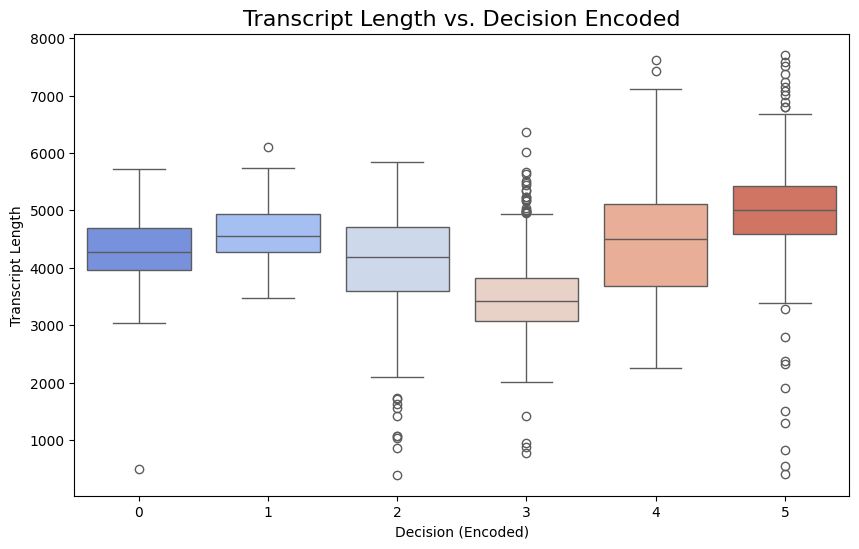


Average Transcript Length by Decision Encoded:
 Decision_encoded
0    4297.206186
1    4613.941748
2    4131.910309
3    3489.664207
4    4455.720133
5    4992.245520
Name: Transcript_Length, dtype: float64


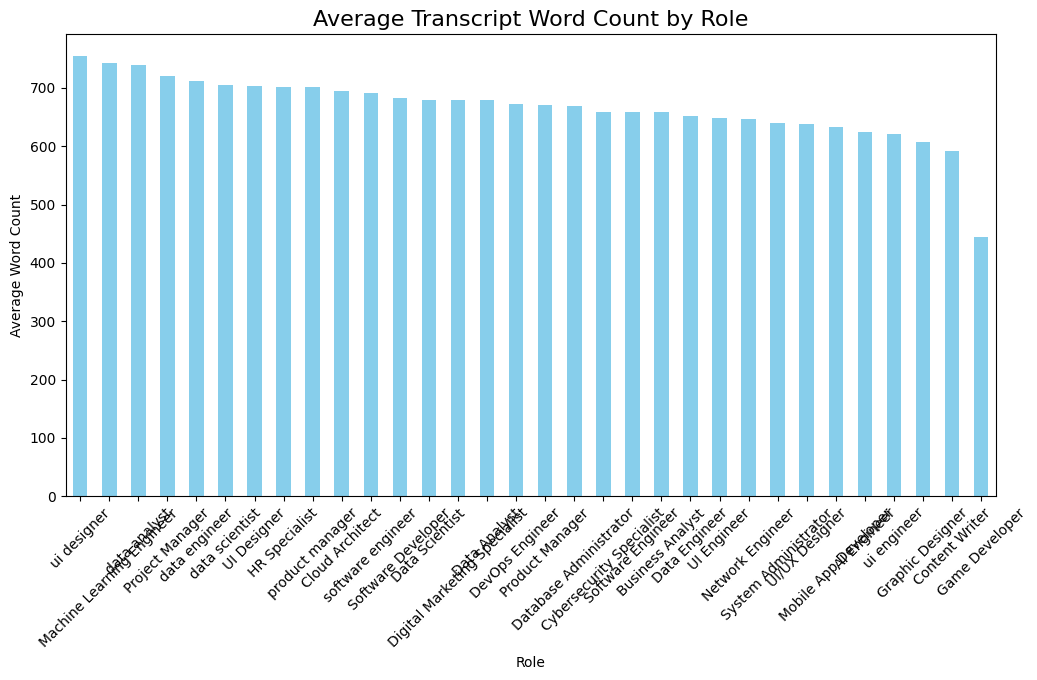


Transcript Word Count Stats by Role:
                               count        mean         std    min     25%  \
Role                                                                         
AI Engineer                    13.0  623.769231  163.040462  354.0  554.00   
Business Analyst               11.0  658.636364   89.473206  517.0  600.00   
Cloud Architect                 8.0  694.625000  126.247984  473.0  624.00   
Content Writer                  5.0  591.200000   96.848851  466.0  532.00   
Cybersecurity Specialist        9.0  658.666667  110.719240  535.0  569.00   
Data Analyst                   78.0  678.653846  156.008061  349.0  576.75   
Data Engineer                 192.0  651.317708  151.583606  404.0  531.50   
Data Scientist                292.0  679.623288  136.612510   84.0  575.00   
Database Administrator          9.0  669.333333  116.638330  474.0  574.00   
DevOps Engineer                16.0  672.187500   65.624405  512.0  638.00   
Digital Marketing Special

C:\Users\sidhe\AppData\Local\Temp\ipykernel_3236\883227865.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision_encoded', y='Transcript_Sentiment', data=data, palette="viridis")


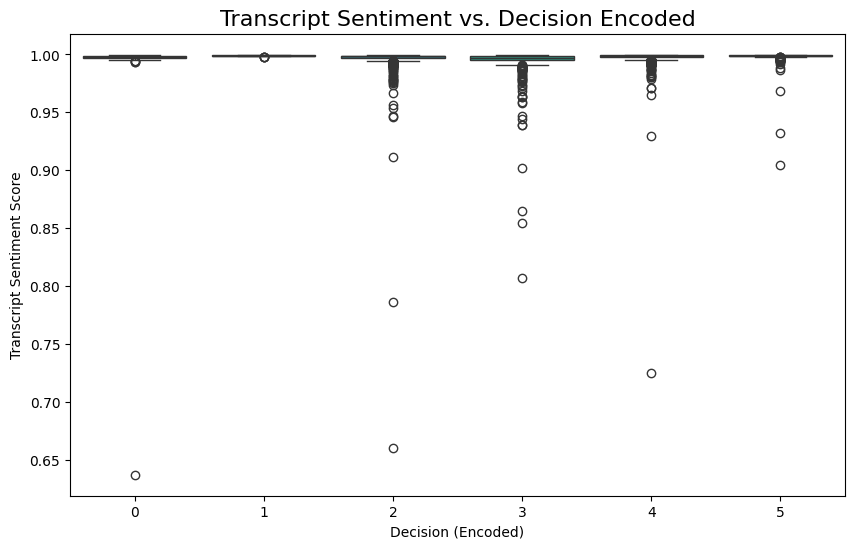


Average Sentiment Scores by Decision Encoded:
 Decision_encoded
0    0.994235
1    0.999043
2    0.996574
3    0.994306
4    0.997563
5    0.998399
Name: Transcript_Sentiment, dtype: float64


In [5]:
# Transcript Length vs. Decision Encoded
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decision_encoded', y='Transcript_Length', data=data, palette="coolwarm")
plt.title('Transcript Length vs. Decision Encoded', fontsize=16)
plt.xlabel('Decision (Encoded)')
plt.ylabel('Transcript Length')
plt.show()

# Insight: Print average transcript length per decision category
avg_transcript_length = data.groupby('Decision_encoded')['Transcript_Length'].mean()
print("\nAverage Transcript Length by Decision Encoded:\n", avg_transcript_length)

# Average Transcript Word Count by Role
role_word_count = data.groupby('Role')['Transcript_Word_Count'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
role_word_count.plot(kind='bar', color='skyblue')
plt.title('Average Transcript Word Count by Role', fontsize=16)
plt.xlabel('Role')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.show()

# Insight: Print detailed word count stats per role
print("\nTranscript Word Count Stats by Role:\n", data.groupby('Role')['Transcript_Word_Count'].describe())

# Sentiment vs. Decision Encoded
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decision_encoded', y='Transcript_Sentiment', data=data, palette="viridis")
plt.title('Transcript Sentiment vs. Decision Encoded', fontsize=16)
plt.xlabel('Decision (Encoded)')
plt.ylabel('Transcript Sentiment Score')
plt.show()

# Insight: Print average sentiment scores per decision category
avg_sentiment = data.groupby('Decision_encoded')['Transcript_Sentiment'].mean()
print("\nAverage Sentiment Scores by Decision Encoded:\n", avg_sentiment)


Similarity Scores

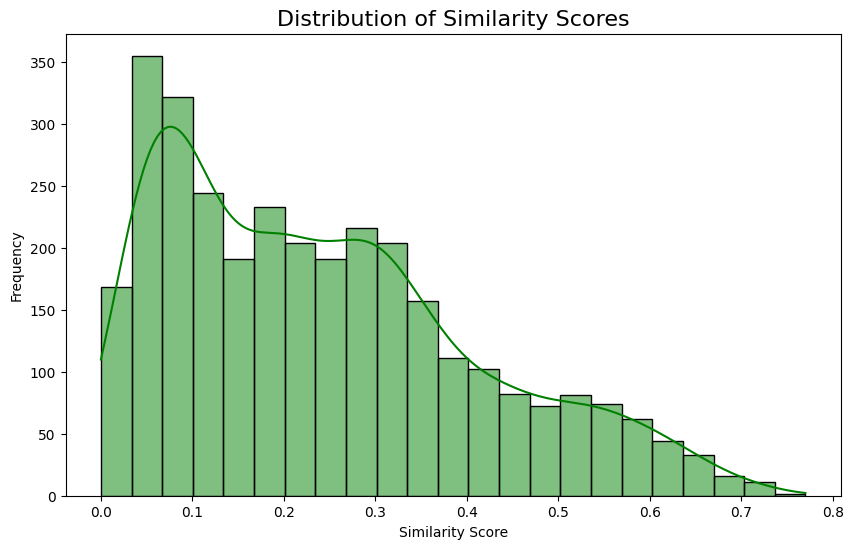


Similarity Score Statistics:
 count    3174.000000
mean        0.241665
std         0.169375
min         0.000000
25%         0.095544
50%         0.214290
75%         0.345772
max         0.769954
Name: Similarity_Score, dtype: float64


C:\Users\sidhe\AppData\Local\Temp\ipykernel_3236\2281967495.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision_encoded', y='Similarity_Score', data=data, palette="coolwarm")


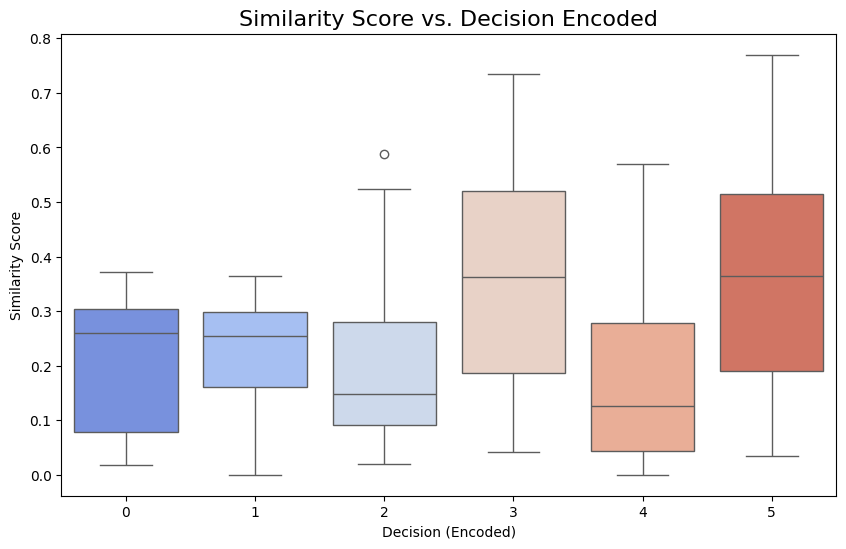


Average Similarity Score by Decision Encoded:
 Decision_encoded
0    0.206075
1    0.230690
2    0.186328
3    0.355458
4    0.165162
5    0.359482
Name: Similarity_Score, dtype: float64


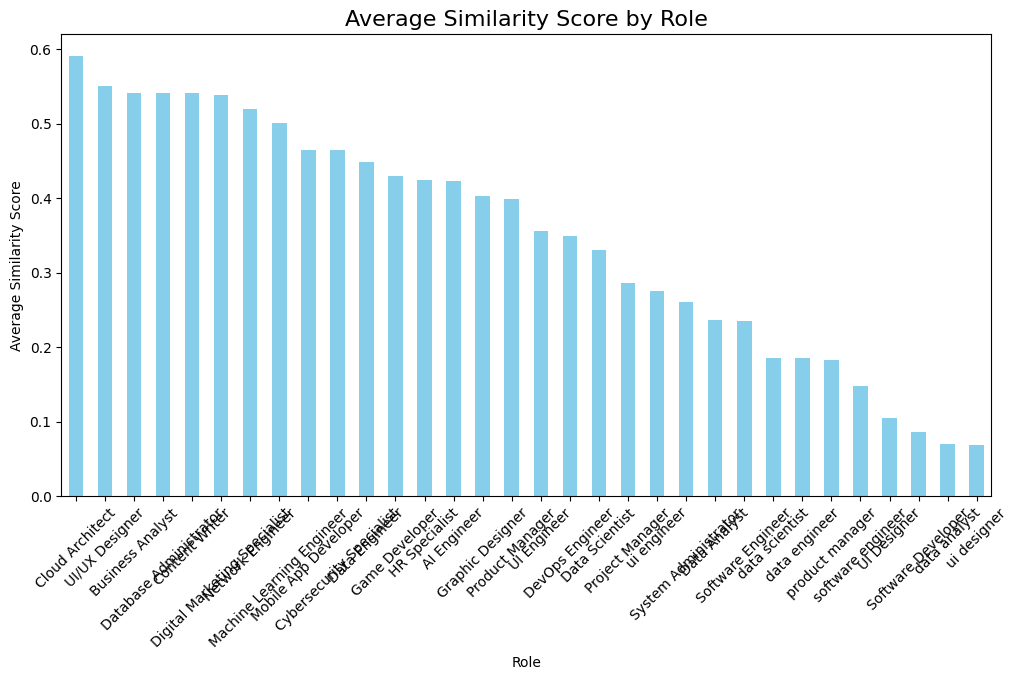


Similarity Score Stats by Role:
                               count      mean       std       min       25%  \
Role                                                                          
AI Engineer                    13.0  0.422925  0.065283  0.256344  0.404529   
Business Analyst               11.0  0.541264  0.052702  0.445495  0.513580   
Cloud Architect                 8.0  0.590430  0.031484  0.519554  0.587847   
Content Writer                  5.0  0.540738  0.029734  0.505945  0.511670   
Cybersecurity Specialist        9.0  0.464233  0.065895  0.340540  0.437536   
Data Analyst                   78.0  0.236162  0.136709  0.118927  0.163411   
Data Engineer                 192.0  0.448465  0.202037  0.134587  0.209028   
Data Scientist                292.0  0.330310  0.139794  0.060176  0.214136   
Database Administrator          9.0  0.541093  0.046292  0.482423  0.523071   
DevOps Engineer                16.0  0.349224  0.055263  0.248460  0.317831   
Digital Marketing 

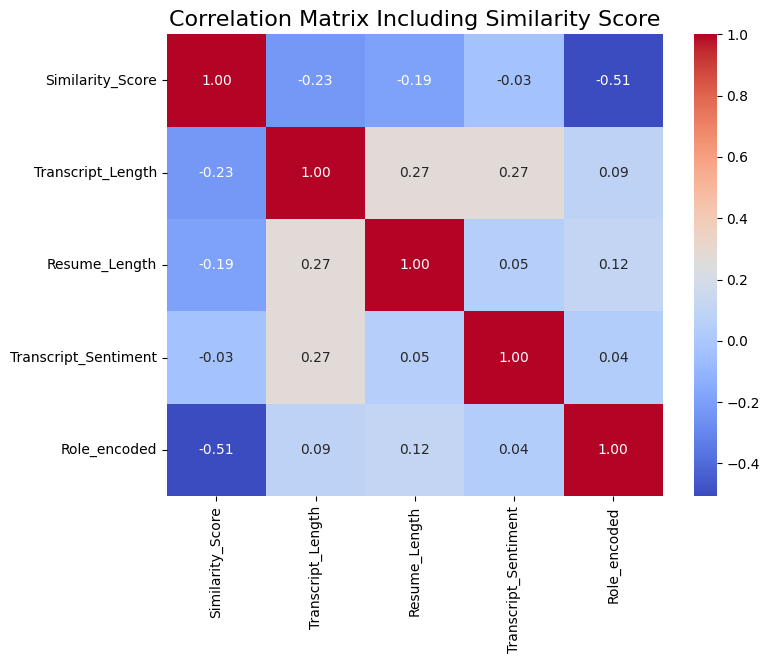

In [8]:
# Plot the distribution of Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Similarity_Score'], kde=True, color="green")
plt.title('Distribution of Similarity Scores', fontsize=16)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Insight: Print basic statistics for Similarity Scores
similarity_stats = data['Similarity_Score'].describe()
print("\nSimilarity Score Statistics:\n", similarity_stats)

# Similarity Score vs. Decision Encoded
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decision_encoded', y='Similarity_Score', data=data, palette="coolwarm")
plt.title('Similarity Score vs. Decision Encoded', fontsize=16)
plt.xlabel('Decision (Encoded)')
plt.ylabel('Similarity Score')
plt.show()

# Insight: Print average similarity scores for each decision category
avg_similarity_by_decision = data.groupby('Decision_encoded')['Similarity_Score'].mean()
print("\nAverage Similarity Score by Decision Encoded:\n", avg_similarity_by_decision)

# Average Similarity Score by Role
role_similarity = data.groupby('Role')['Similarity_Score'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
role_similarity.plot(kind='bar', color='skyblue')
plt.title('Average Similarity Score by Role', fontsize=16)
plt.xlabel('Role')
plt.ylabel('Average Similarity Score')
plt.xticks(rotation=45)
plt.show()

# Insight: Print detailed stats for similarity scores by role
print("\nSimilarity Score Stats by Role:\n", data.groupby('Role')['Similarity_Score'].describe())


# Correlation with Similarity Score
correlation_features = ['Similarity_Score', 'Transcript_Length', 'Resume_Length', 
                        'Transcript_Sentiment', 'Role_encoded']
correlation_matrix = data[correlation_features].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Similarity Score', fontsize=16)
plt.show()

